In [1]:
#Google Colab File -ashutoshtiwari13

import gym
import numpy as np
import random
import math
from collections import defaultdict,deque
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("white")

env =gym.make('CliffWalking-v0')

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [4]:
def plot_values(V):
	# reshape the state-value function
	V = np.reshape(V, (4,12))
	# plot the state-value function
	fig = plt.figure(figsize=(15,5))
	ax = fig.add_subplot(111)
	im = ax.imshow(V, cmap='cool')
	for (j,i),label in np.ndenumerate(V):
	    ax.text(i, j, np.round(label,3), ha='center', va='center', fontsize=14)
	plt.tick_params(bottom='off', left='off', labelbottom='off', labelleft='off')
	plt.title('State-Value Function')
	plt.show()

In [5]:
print(env.action_space)
print(env.observation_space)

Discrete(4)
Discrete(48)


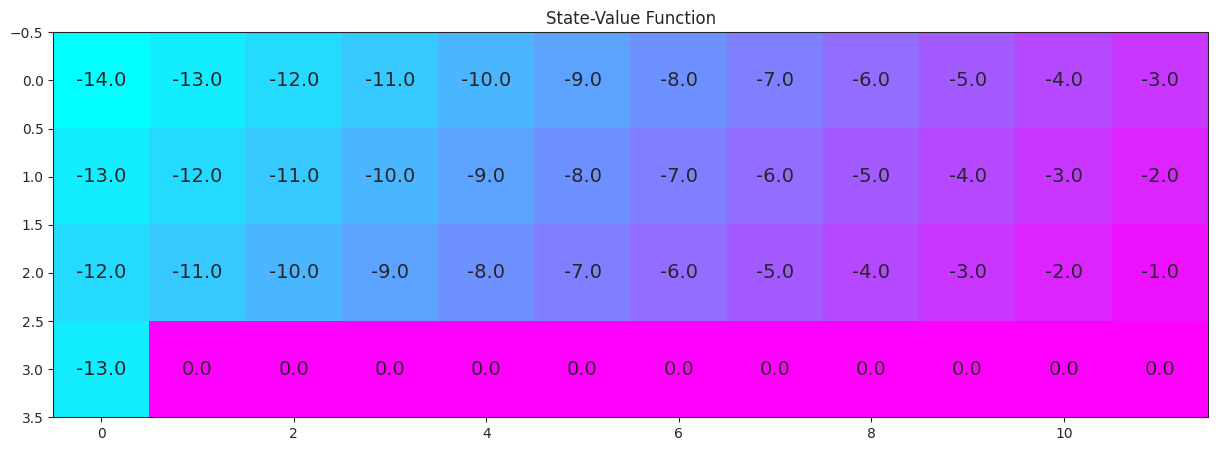

In [6]:
#Optimal state-value fucntion
V_opt = np.zeros((4,12))
V_opt[0][0:13]= -np.arange(3,15)[::-1]
V_opt[1][0:13]= -np.arange(3,15)[::-1]+1
V_opt[2][0:13]= -np.arange(3,15)[::-1]+2
V_opt[3][0] = -13

plot_values(V_opt)

In [7]:
#Sarsa Temporal Difference control
def sarsa_update(alpha , gamma , Q, state , action,reward, next_state =None , next_action = None):
  current = Q[state][action]
  Qsa_next = Q[next_state][next_action] if next_state is not None else 0
  target = reward + (gamma * Qsa_next)                    ##difference step
  new_value = current  + (alpha *(target - current))
  return new_value

def epsilon_greedy(Q, state, nA, episode):
  if random.random() > episode:
    return np.argmax(Q[state])
  else:
    return random.choice(np.arange(nA))

In [11]:
def generate_episode(Q, nA , eps, alpha, plot_every=100,gamma=1.0):
  score =0
  scores = deque(maxlen = plot_every)
  state = env.reset()
  action = epsilon_greedy(Q, state, nA, eps)
  while True:
    next_state, reward, done , info = env.step(action)
    score +=reward

    if not done:
      next_action = epsilon_greedy(Q, next_state, nA, eps)
      Q[state][action] = sarsa_update(alpha, gamma , Q, state, action , reward , next_state, next_action)
      state = next_state
      action = next_action

    if done:
      Q[state][action] =  sarsa_update(alpha, gamma , Q, state, action , reward)
      scores.append(score)
      break
  return scores



In [16]:
def sarsa_td_control(env, num_episodes, alpha, gamma=1.0, plot_every=100):

  nA= env.action_space.n
  Q = defaultdict(lambda: np.zeros(nA))
  avg_scores = deque(maxlen = num_episodes)

  for episode in range(1, num_episodes+1):
    if episode % 100 ==0:
      print("\r Epsiode :{}/{}.".format(episode,num_episodes),end="")
    eps = 1.0/episode

    estimated_scores = generate_episode(Q, nA , eps, alpha)
    if (episode % plot_every ==0):
      avg_scores.append(np.mean(estimated_scores))

  #plt.plot(np.linspace(0, num_episodes, len(avg_scores), endpoint=False), np.array(avg_scores))
  #plt.xlabel("Episode Number")
  #plt.ylabel("Average reward Over %d rewards" % plot_every)
  #plt.show()

  #print(("Best Average reward over %d Epsiode: " % plot_every), np.max(avg_scores))
  return Q , np.max(avg_scores)

In [20]:
num_episodes = 10000
# Define a range of hyperparameter values to test
alphas = [0.1, 0.2, 0.3, 0.4, 0.5]
gammas = [0.8, 0.85, 0.9, 0.95, 1.0]


In [17]:
best_result = -float('inf')
best_hyperparameters = None

for alpha in alphas:
    for gamma in gammas:
      Q_sarsa, max_avg_score = sarsa_td_control(env,num_episodes, alpha=alpha, gamma=gamma)
      if max_avg_score > best_result:
        best_result = max_avg_score
        best_hyperparameters = (alpha, gamma)
        best_Q = Q_sarsa

 Epsiode :5000/5000.

In [18]:
best_hyperparameters

(0.1, 1.0)

In [23]:
def sarsa_td_control_with_plot(env, num_episodes, alpha, gamma=1.0, plot_every=100):

  nA= env.action_space.n
  Q = defaultdict(lambda: np.zeros(nA))
  avg_scores = deque(maxlen = num_episodes)

  for episode in range(1, num_episodes+1):
    if episode % 100 ==0:
      print("\r Epsiode :{}/{}.".format(episode,num_episodes),end="")
    eps = 1.0/episode

    estimated_scores = generate_episode(Q, nA , eps, alpha)
    if (episode % plot_every ==0):
      avg_scores.append(np.mean(estimated_scores))

  plt.plot(np.linspace(0, num_episodes, len(avg_scores), endpoint=False), np.array(avg_scores))
  plt.xlabel("Episode Number")
  plt.ylabel("Average reward Over %d rewards" % plot_every)
  plt.show()

  print(("Best Average reward over %d Epsiode: " % plot_every), np.max(avg_scores))
  return Q , np.max(avg_scores)

 Epsiode :10000/10000.

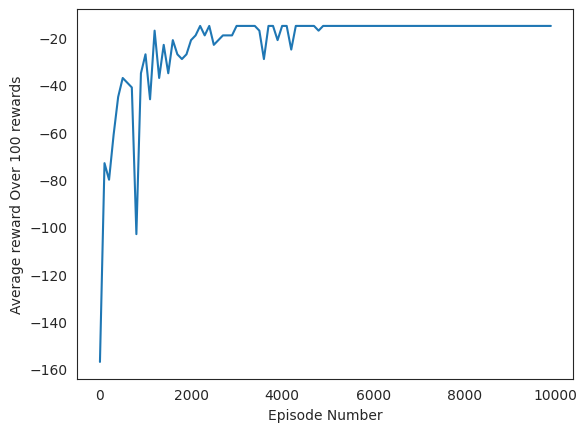

Best Average reward over 100 Epsiode:  -15.0


In [24]:
Q_sarsa, max_avg_score = sarsa_td_control_with_plot(env,10000, 0.01,1.0)

[[ 1  3  1  1  1  1  1  1  3  1  1  2]
 [ 1  1  1  1  1  1  1  2  1  2  2  2]
 [ 0  1  1  1  1  1  1  1  1  1  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]


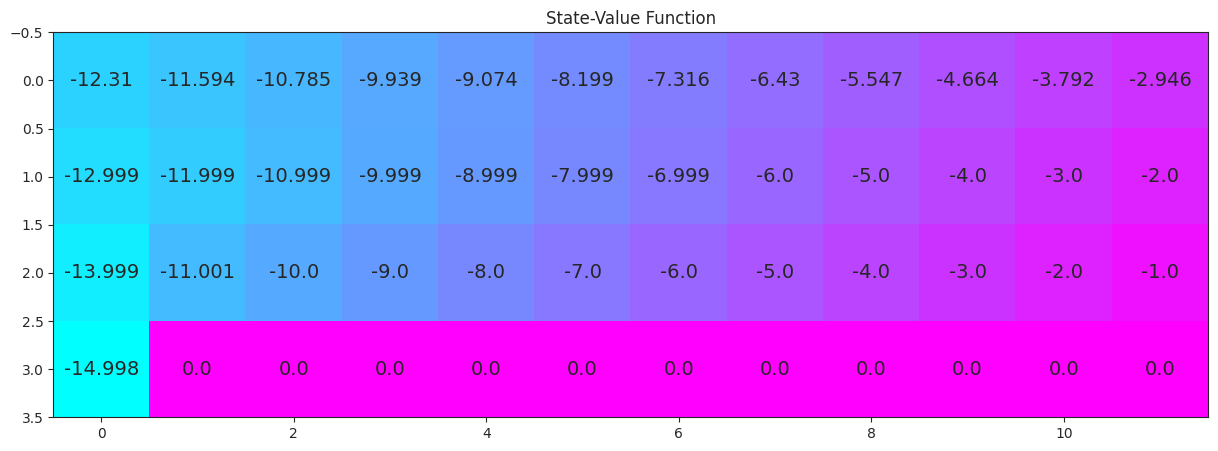

In [25]:
#Estimated optimal policy
policy_sarsa = np.array([np.argmax(Q_sarsa[key]) if key in Q_sarsa else -1 for key in np.arange(48)]).reshape(4,12)
print(policy_sarsa)

# plot the estimated optimal state-value function
V_sarsa = ([np.max(Q_sarsa[key]) if key in Q_sarsa else 0 for key in np.arange(48)])
plot_values(V_sarsa)